In [1]:
import cv2
import numpy as np
# import textwrap

### Display image use
from PIL import Image
from IPython.display import display

In [2]:
# 'item':[quantity, unit price]

stuffs = {'Apple':[1, 50], 
          'Banana':[3, 20], 
          'TESTTTT':[3, 20], 
          'TesttheLongItemNameWillBeLookLike':[3, 20], 
          'Chikweok':[10, 20]}


stuffs = {'Apple':[1, 0.01], 
          'Banana':[3, 0.06], 
          'TESTTTT':[3, 0.7], 
          'TesttheLongItemNameWillBeLookLike':[3, 1.23], 
          'Chikweok':[10, 1.0]}

height: 743 | width: 1000 | channels: 3
total_height 260 price_y2 = 240


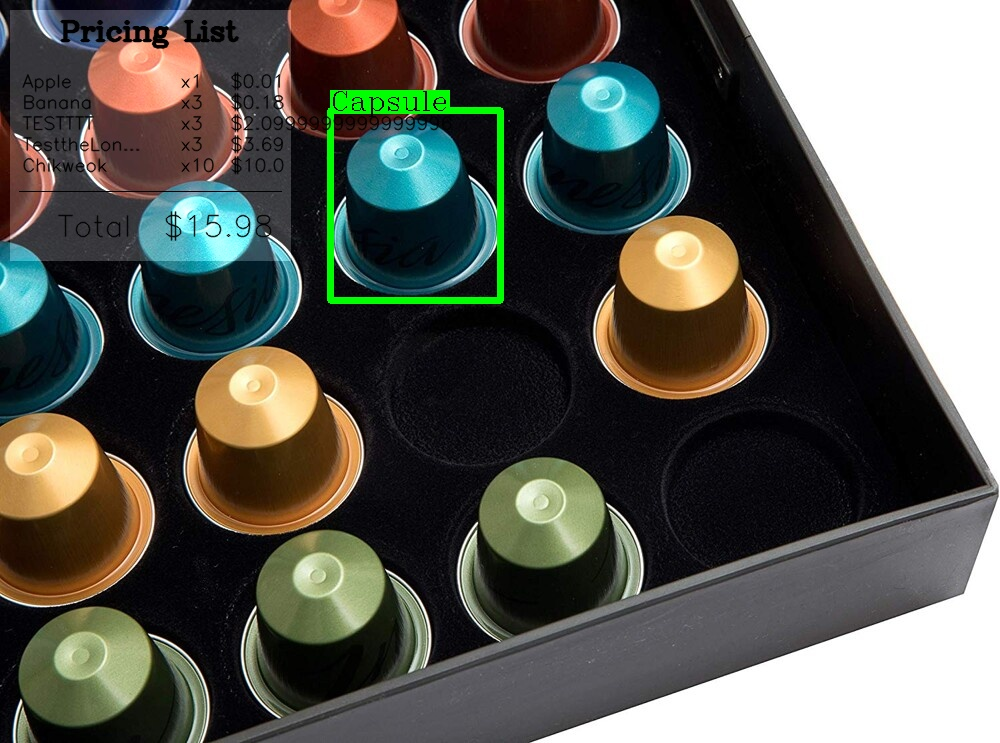

In [3]:
img = cv2.imread('example.jpg')
height, width, channels = img.shape
print("height:", height, "| width:", width, "| channels:", channels)

# --------------------------------
### Object parts.
label = 'Capsule' 
x1 = 330 
y1 = 110
x2 = 500
y2 = 300
cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 6)
font = fontFace = cv2.FONT_HERSHEY_COMPLEX
fontScale = 0.9
thickness = 1
labelSize = cv2.getTextSize(label, fontFace, fontScale, thickness)
_x1 = x1 # bottomleft x of text
_y1 = y1 # bottomleft y of text
_x2 = x1+labelSize[0][0] # topright x of text
_y2 = y1-labelSize[0][1] # topright y of text
cv2.rectangle(img, (_x1,_y1), (_x2,_y2), (0,255,0), cv2.FILLED) # text background
cv2.putText(img, label, (x1,y1), fontFace, fontScale, (0,0,0), thickness)

# --------------------------------
### Price area.
#### Background
price_x1 = price_y1 = int(10)
price_x2 = price_x1 + 280
price_y2 = total_height = 14*len(stuffs) + 190
print("total_height", total_height, "price_y2 = 240")
# price_y2 = 240
zeros1 = np.zeros((img.shape), dtype=np.uint8)
zeros_mask1 = cv2.rectangle(zeros1, (price_x1, price_y1), (price_x2, price_y2),
                    color=(255,255,255), thickness=-1 )

alpha = 1
beta = 0.2
gamma = 0        
img = cv2.addWeighted(img, alpha, zeros_mask1, beta, gamma)

### Title
price_list_label = 'Pricing List' 
price_list_labelSize = cv2.getTextSize(price_list_label, fontFace, fontScale, thickness)
font_size = 0.9
font_thickness = 2
cv2.putText(img, price_list_label, (price_x1+50, price_y1+30), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)

### Each item
#### we need to prepare the words for writing use.
wrapped_text = []
word_limit = 10
total_price = 0
for i in stuffs:
    name_len = len(i)
    
    if name_len > word_limit:
        new_item_name = i[:word_limit] + '...' 
    else:
        new_item_name = i + ' '*(word_limit - name_len + 3)
    price_item = stuffs[i][0] * stuffs[i][1]
    total_price += price_item
#     new_item_name = new_item_name + ' x'+str(stuffs[i][0]) + '  $' + str(price_item)
#     wrapped_text.append(new_item_name)
    wrapped_text.append([new_item_name, 'x'+str(stuffs[i][0]), '$' + str(price_item)])
# print(wrapped_text)

### wrap part
x, y = (price_x1+12), (price_y1 + 30 + price_list_labelSize[0][1])

for i, line in enumerate(wrapped_text):
#     print("len", len(line))
#     textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
#     print(">>> line: ", line, " | textsize: ", textsize)
#     gap = 5 #textsize[1]
#     print("i * gap", i * gap, " | textsize[1]", textsize[1])
    
#     y = int((y + textsize[1])) + 7 #i * gap
#     print("Final y", y)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     font_size = 0.6
#     font_thickness = 1
#     cv2.putText(img, line, (x, y), font,
#                 font_size, 
#                 (0,0,0), 
#                 font_thickness, 
#                 lineType = cv2.LINE_AA)
    
    ### Class object
    textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
    y = int((y + textsize[1])) + 7
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 0.6
    font_thickness = 1
    cv2.putText(img, line[0], (x, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    
    ### Quantity
    x_quantity = 180 
    cv2.putText(img, line[1], (x_quantity, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    
    ### Unit price
    x_price = 230 
    cv2.putText(img, line[2], (x_price, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    

## line
y_line = y+20
cv2.line(img, (x-3, y_line), (price_x2 - (x-3-price_x1), y_line), (0, 0, 0), 1)

## Total price
total_price_word = 'Total  ${}'.format(total_price)
font_size = 1
font_thickness = 1
y_total_price = y_line + 45
x_total_price = x + 35
cv2.putText(img, total_price_word, (x_total_price, y_total_price), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)

cv2.imwrite("result.jpg", img)


from IPython.display import Image 
pil_img = Image(filename='result.jpg')
display(pil_img)

height: 743 | width: 1000 | channels: 3
total_height 260 price_y2 = 240


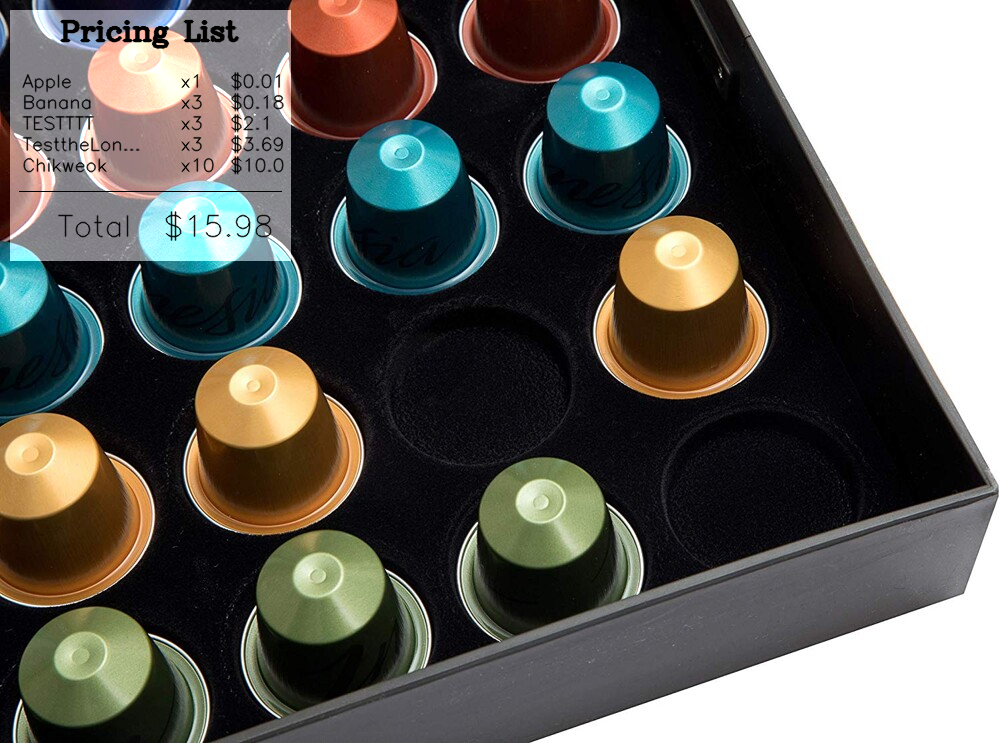

In [4]:
def calculating_prices(ori_img, stuffs):
    """
    # 'item':[quantity, unit price]
    stuffs = {'Apple':[1, 50], 'Banana':[3, 20], 'testtt':[3, 20], 'TesttheLongItemNameWillBeLookLike':[3, 20], 'Chikweok':[10, 20]}
    """
    # img = cv2.imread('example.jpg')
    height, width, channels = ori_img.shape
    print("height:", height, "| width:", width, "| channels:", channels)

    # --------------------------------
    ### Price area.
    #### Background
    price_x1 = price_y1 = int(10)
    price_x2 = price_x1 + 280
    price_y2 = total_height = 14*len(stuffs) + 190
    print("total_height", total_height, "price_y2 = 240")
    # price_y2 = 240
    zeros1 = np.zeros((ori_img.shape), dtype=np.uint8)
    zeros_mask1 = cv2.rectangle(zeros1, (price_x1, price_y1), (price_x2, price_y2),
                        color=(255,255,255), thickness=-1 )

    alpha = 1
    beta = 0.5
    gamma = 0        
    img = cv2.addWeighted(ori_img, alpha, zeros_mask1, beta, gamma)

    ### Title
    price_list_label = 'Pricing List' 
    font = fontFace = cv2.FONT_HERSHEY_COMPLEX
    fontScale = 0.9
    thickness = 1
    price_list_labelSize = cv2.getTextSize(price_list_label, fontFace, fontScale, thickness)
    font_size = 0.9
    font_thickness = 2
    cv2.putText(img, price_list_label, (price_x1+50, price_y1+30), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)

    ### Each item
    #### we need to prepare the words for writing use.
    wrapped_text = []
    word_limit = 10
    total_price = 0
    for i in stuffs:
        name_len = len(i)
        
        if name_len > word_limit:
            new_item_name = i[:word_limit] + '...' 
        else:
            new_item_name = i + ' '*(word_limit - name_len + 3)
        price_item = stuffs[i][0] * stuffs[i][1]
        total_price += price_item
    #     new_item_name = new_item_name + ' x'+str(stuffs[i][0]) + '  $' + str(price_item)
    #     wrapped_text.append(new_item_name)
        wrapped_text.append([new_item_name, 'x'+str(stuffs[i][0]), '$' + str(round(price_item, 2))])
    # print(wrapped_text)

    ### wrap part
    x, y = (price_x1+12), (price_y1 + 30 + price_list_labelSize[0][1])

    for i, line in enumerate(wrapped_text):
    #     print("len", len(line))
    #     textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
    #     print(">>> line: ", line, " | textsize: ", textsize)
    #     gap = 5 #textsize[1]
    #     print("i * gap", i * gap, " | textsize[1]", textsize[1])
        
    #     y = int((y + textsize[1])) + 7 #i * gap
    #     print("Final y", y)
    #     font = cv2.FONT_HERSHEY_SIMPLEX
    #     font_size = 0.6
    #     font_thickness = 1
    #     cv2.putText(img, line, (x, y), font,
    #                 font_size, 
    #                 (0,0,0), 
    #                 font_thickness, 
    #                 lineType = cv2.LINE_AA)
        
        ### Class object
        textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
        y = int((y + textsize[1])) + 7
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_size = 0.6
        font_thickness = 1
        cv2.putText(img, line[0], (x, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Quantity
        x_quantity = 180 
        cv2.putText(img, line[1], (x_quantity, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Unit price
        x_price = 230 
        cv2.putText(img, line[2], (x_price, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        

    ## line
    y_line = y+20
    cv2.line(img, (x-3, y_line), (price_x2 - (x-3-price_x1), y_line), (0, 0, 0), 1)

    ## Total price
    total_price_word = 'Total  ${0:.2f}'.format(total_price)
    font_size = 1
    font_thickness = 1
    y_total_price = y_line + 45
    x_total_price = x + 35
    cv2.putText(img, total_price_word, (x_total_price, y_total_price), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    return img

img = cv2.imread('example.jpg')

masked_image = calculating_prices(img, stuffs) 

### Display image use
from PIL import Image
from IPython.display import display
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(masked_image))

---
## Calculating prices - Can automatically resize by different image size

height: 1440 | width: 1920 | channels: 3
total_height 260 price_y2 = 240


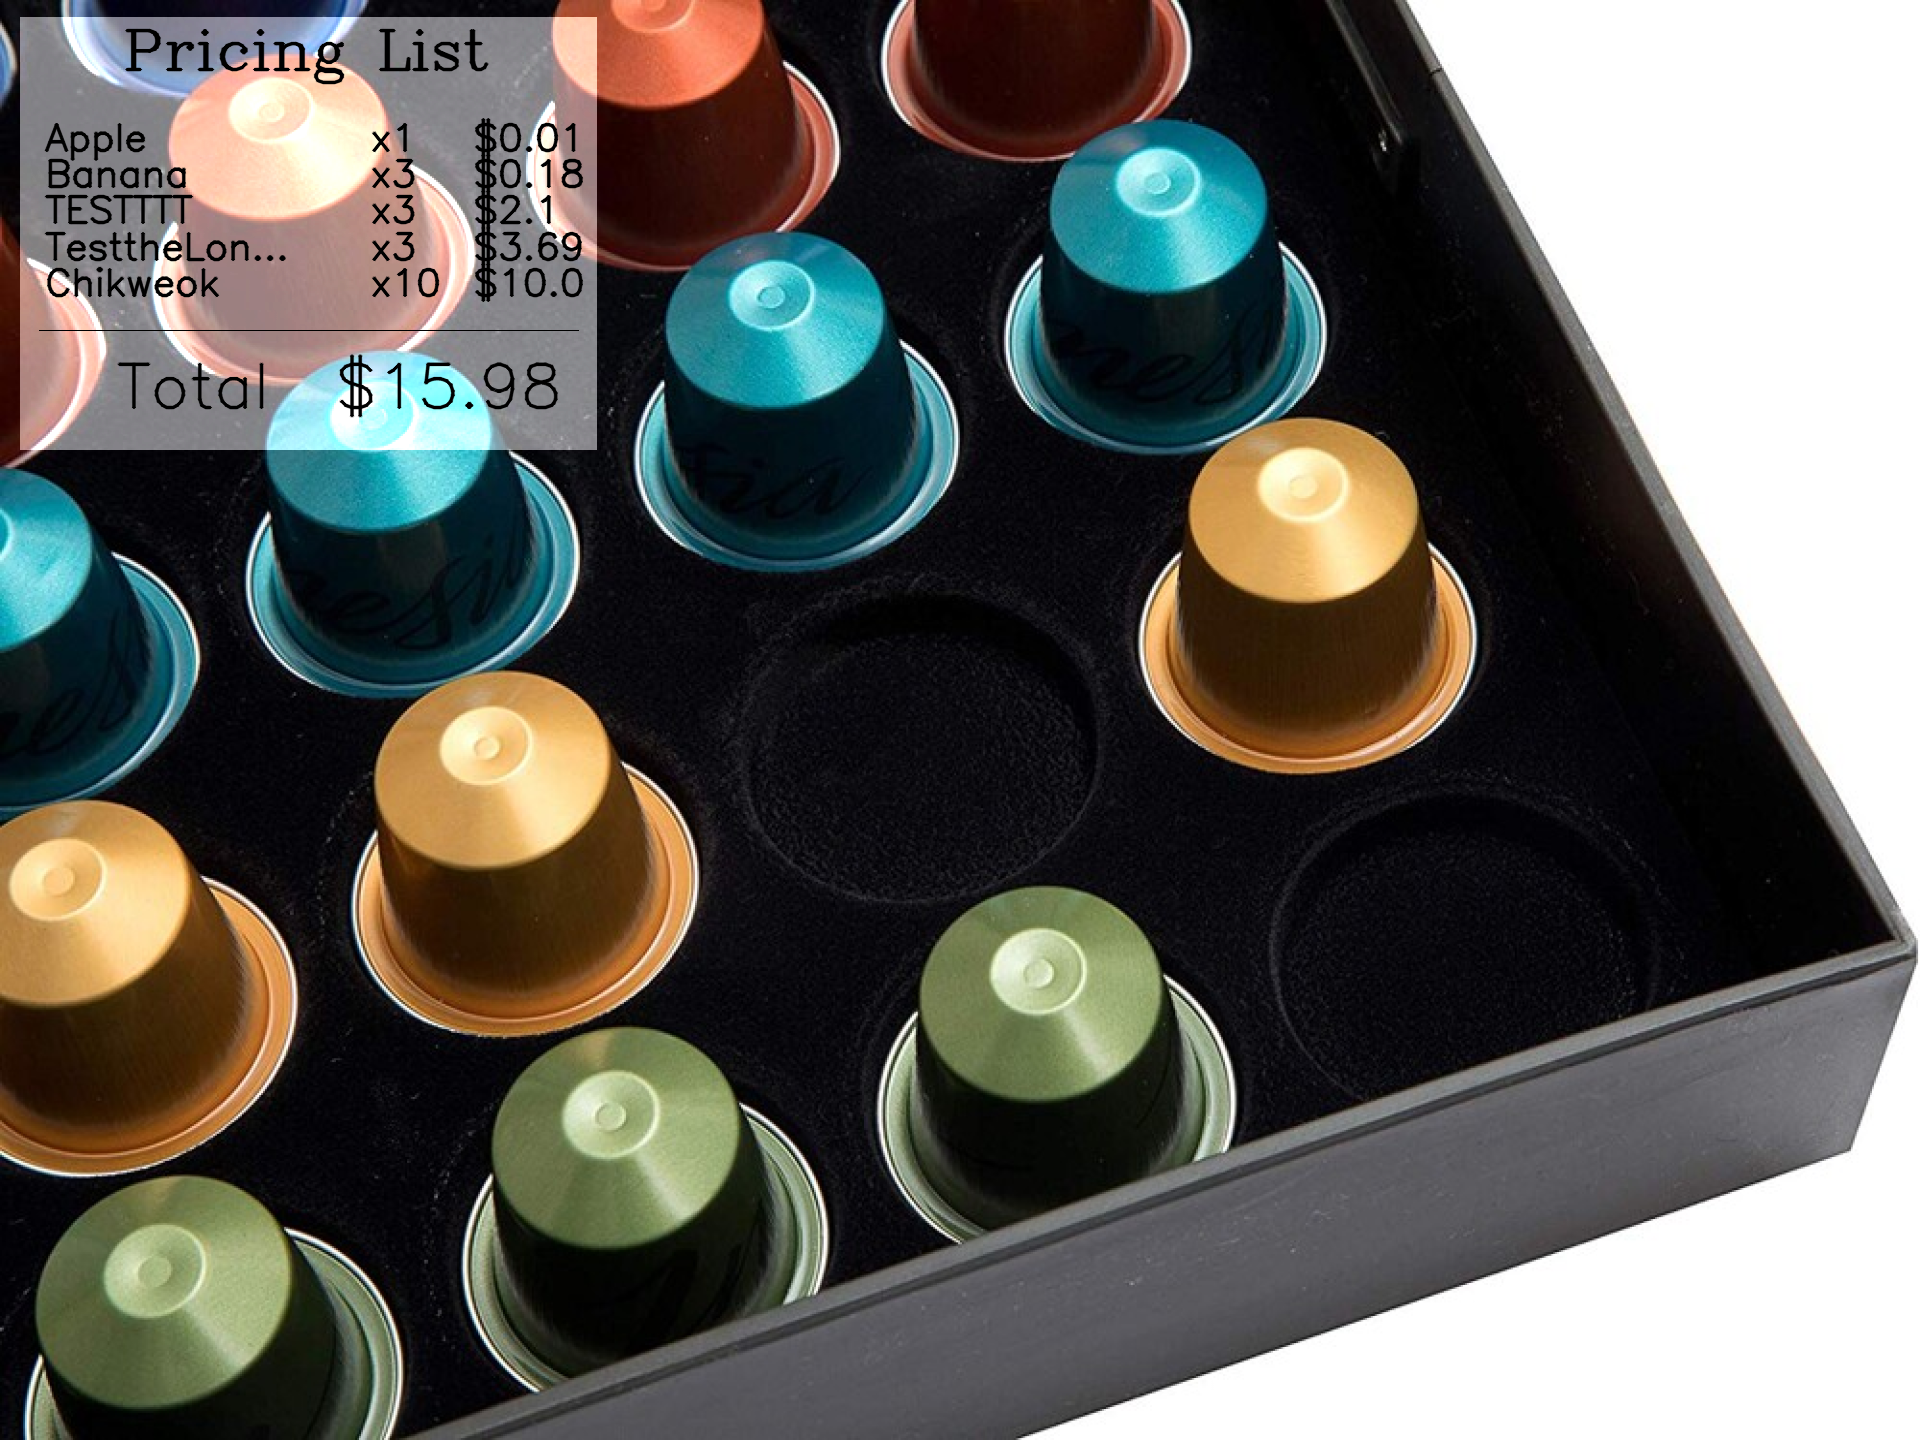

In [5]:
def calculating_prices(ori_img, stuffs):
    """
    # 'item':[quantity, unit price]
    stuffs = {'Apple':[1, 50], 'Banana':[3, 20], 'testtt':[3, 20], 'TesttheLongItemNameWillBeLookLike':[3, 20], 'Chikweok':[10, 20]}
    """
    # img = cv2.imread('example.jpg')
    height, width, channels = ori_img.shape
    print("height:", height, "| width:", width, "| channels:", channels)
    ratio_enable = False
    if height >= 900 and width >= 900:
        ratio_enable = True
        
    # --------------------------------
    ### Price area.
    #### Background
    price_x1 = price_y1 = int(10)
    price_x2 = price_x1 + 280
    price_y2 = total_height = 14*len(stuffs) + 190
    print("total_height", total_height, "price_y2 = 240")
    # price_y2 = 240
    zeros1 = np.zeros((ori_img.shape), dtype=np.uint8)
    
    x_ratio = 1.0
    y_ratio = 1.0
    if ratio_enable:
        new_background_width = width * 0.3
        x_ratio = new_background_width / (price_x2-price_x1)
        
        new_background_height = height * 0.3
        y_ratio = new_background_height / (price_y2-price_y1)
        
    
    zeros_mask1 = cv2.rectangle(zeros1, (int(price_x1*x_ratio), int(price_y1*y_ratio)), (int(price_x2*x_ratio), int(price_y2*y_ratio)),
                        color=(255,255,255), thickness=-1 )

    alpha = 1
    beta = 0.5
    gamma = 0        
    img = cv2.addWeighted(ori_img, alpha, zeros_mask1, beta, gamma)

    ### Title
    price_list_label = 'Pricing List' 
    font = fontFace = cv2.FONT_HERSHEY_COMPLEX
    fontScale = 0.9
    thickness = 1
    price_list_labelSize = cv2.getTextSize(price_list_label, fontFace, fontScale, thickness)
    font_size = 0.9
    font_thickness = 2
        
    cv2.putText(img, price_list_label, (int((price_x1+50)*x_ratio), int((price_y1+30)*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)

    ### Each item
    #### we need to prepare the words for writing use.
    wrapped_text = []
    word_limit = 10
    total_price = 0
    for i in stuffs:
        name_len = len(i)
        
        if name_len > word_limit:
            new_item_name = i[:word_limit] + '...' 
        else:
            new_item_name = i + ' '*(word_limit - name_len + 3)
        price_item = stuffs[i][0] * stuffs[i][1]
        total_price += price_item
        wrapped_text.append([new_item_name, 'x'+str(stuffs[i][0]), '$' + str(round(price_item, 2))])

    ### wrap part
    x, y = (price_x1+12), (price_y1 + 30 + price_list_labelSize[0][1])

    for i, line in enumerate(wrapped_text):       
        ### Class object
        textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
        y = int((y + textsize[1])) + 7
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_size = 0.6
        font_thickness = 1
        if ratio_enable:
            font_thickness = 2
        cv2.putText(img, line[0], (int(x*x_ratio), int(y*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Quantity
        x_quantity = 180 
        cv2.putText(img, line[1], (int(x_quantity*x_ratio), int(y*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Unit price
        x_price = 230 
        cv2.putText(img, line[2], (int(x_price*x_ratio), int(y*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        

    ## line
    y_line = y+20
    
    cv2.line(img, ( int((x-3)*x_ratio), int(y_line*y_ratio)), 
             (int((price_x2 - (x-3-price_x1))*x_ratio), int(y_line*y_ratio)), 
             (0, 0, 0), 1)

    ## Total price
    total_price_word = 'Total  ${}'.format(round(total_price,2))
    font_size = 1
    font_thickness = 1
    if ratio_enable:
            font_thickness = 2
            
    y_total_price = y_line + 45
    x_total_price = x + 35
     
    cv2.putText(img, total_price_word, (int(x_total_price*x_ratio), int(y_total_price*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    return img

img = cv2.imread('example.jpg')
img = cv2.resize(img, (1920, 1440), interpolation=cv2.INTER_AREA)
# img = cv2.resize(img, (1296, 960), interpolation=cv2.INTER_AREA)

masked_image = calculating_prices(img, stuffs) 

### Display image use
from PIL import Image
from IPython.display import display
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(masked_image))

----
## Calculate quantity - can automatically resize by different image size

height: 1440 | width: 1920 | channels: 3
total_height 298 number_y2 = 240
Drawing the total number.


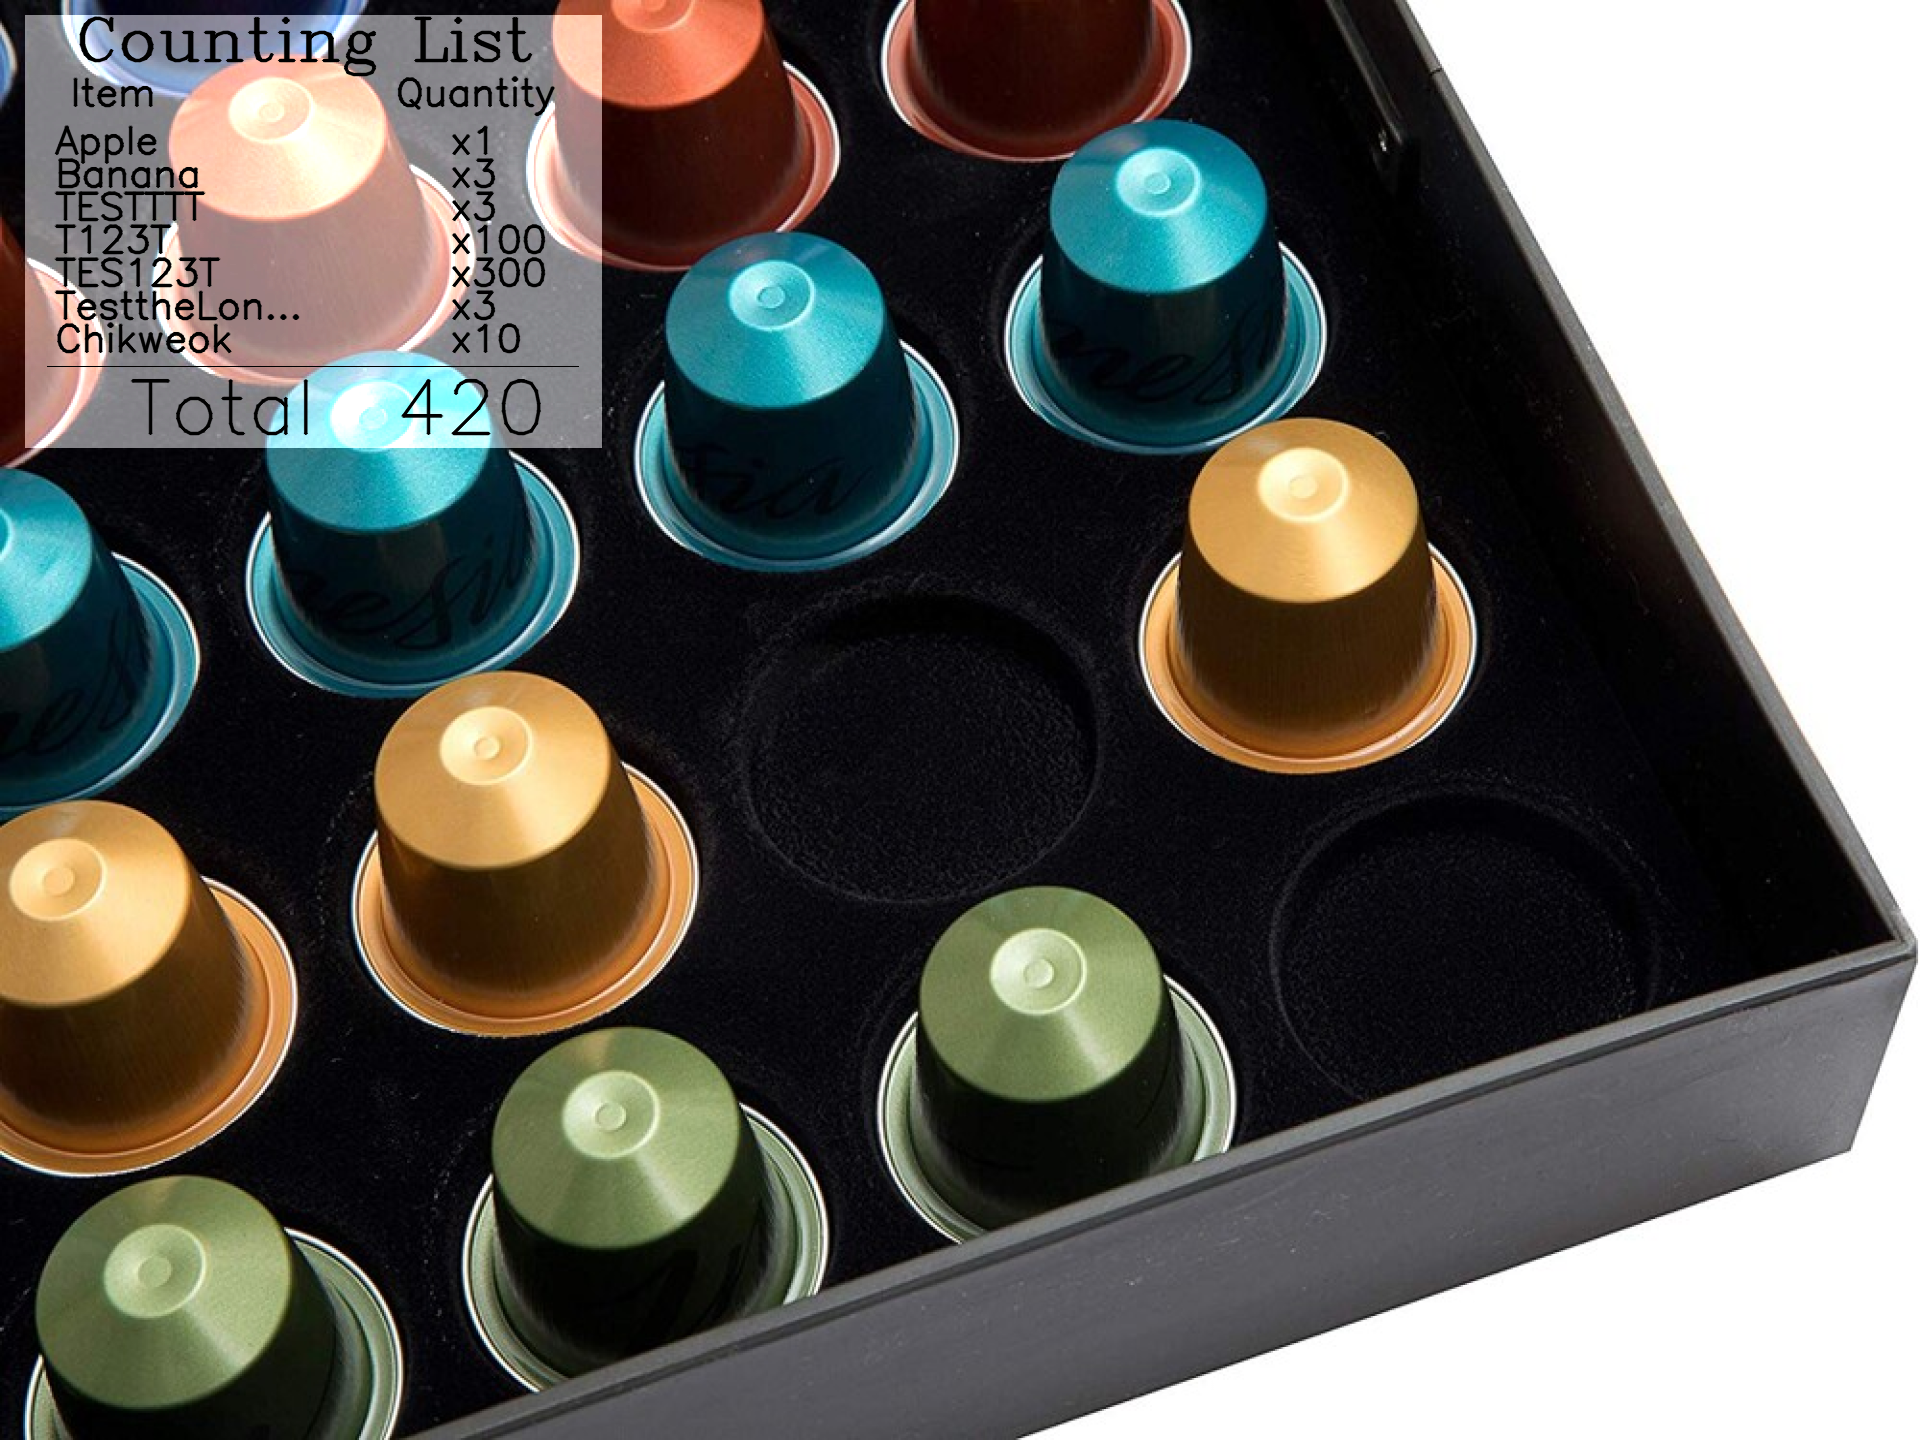

In [6]:
def calculating_quantity(ori_img, stuffs):
    """
    # 'item':int(quantity)
    stuffs = {'Apple':1, 'Banana':3, 'testtt':3, 'TesttheLongItemNameWillBeLookLike':3, 'Chikweok':10}
    """
    height, width, channels = ori_img.shape
    print("height:", height, "| width:", width, "| channels:", channels)
    ratio_enable = False
    if height >= 900 and width >= 900:
        ratio_enable = True

    # --------------------------------
    ### number area.
    #### Background
    number_x1 = number_y1 = int(10)
    number_x2 = number_x1 + 230 
    number_y2 = total_height = 14*len(stuffs) + 200
    if ratio_enable and len(stuffs) > 7:
        number_y2 = total_height = 14*len(stuffs) + 240
        
    print("total_height", total_height, "number_y2 = 240")
    # number_y2 = 240
    zeros1 = np.zeros((ori_img.shape), dtype=np.uint8)
    
    x_ratio = 1.0
    y_ratio = 1.0
    if ratio_enable:
        new_background_width = width * 0.3
        x_ratio = new_background_width / (number_x2-number_x1)
        
        new_background_height = height * 0.3
        y_ratio = new_background_height / (number_y2-number_y1)
        
    zeros_mask1 = cv2.rectangle(zeros1, (int(number_x1*x_ratio), int(number_y1*y_ratio)), (int(number_x2*x_ratio), int(number_y2*y_ratio)),
                        color=(255,255,255), thickness=-1 )

    alpha = 1
    beta = 0.5
    gamma = 0        
    img = cv2.addWeighted(ori_img, alpha, zeros_mask1, beta, gamma)

    ### Title
    number_list_label = 'Counting List' 
    font = fontFace = cv2.FONT_HERSHEY_COMPLEX
    fontScale = 0.9
    thickness = 1
    number_list_labelSize = cv2.getTextSize(number_list_label, fontFace, fontScale, thickness)
    font_size = 0.8
    font_thickness = 2
     
    cv2.putText(img, number_list_label, (int((number_x1+20)*x_ratio), int((number_y1+30)*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    
    ### Title
    number_list_label = ' Item            Quantity' 
    font = fontFace = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.9
    thickness = 1
    number_list_labelSize = cv2.getTextSize(number_list_label, fontFace, fontScale, thickness)
    font_size = 0.5
    font_thickness = 1
    if ratio_enable:
        font_thickness = 2
    
    cv2.putText(img, number_list_label, (int((number_x1+10)*x_ratio), int((number_y1+60)*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)


    ### Each item
    #### we need to prepare the words for writing use.
    wrapped_text = []
    word_limit = 10
    total_number = 0
    for i in stuffs:
        name_len = len(i)
        if name_len > word_limit:
            new_item_name = i[:word_limit] + '...' 
        else:
            new_item_name = i + ' '*(word_limit - name_len + 3)

        total_number += stuffs[i]
        wrapped_text.append([new_item_name, 'x'+str(stuffs[i])])


    ### wrap part
    x, y = (number_x1+12), (number_y1 + 50 + number_list_labelSize[0][1])
    
    for i, line in enumerate(wrapped_text):
        ### Class object
        textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
        y = int((y + textsize[1])) + 7
        if ratio_enable:
            y += 3
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_size = 0.6
        font_thickness = 1
        if ratio_enable:
            font_thickness = 2
            font_size = 0.5
            
        cv2.putText(img, line[0], (int(x*x_ratio), int(y*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        ### Quantity
        x_quantity = 180
        cv2.putText(img, line[1], (int(x_quantity*x_ratio), int(y*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)       

    ## line
    y_line = y+20
    if ratio_enable:
        y_line = y+10
    cv2.line(img, (int((x-3)*x_ratio), int(y_line*y_ratio)), (int((number_x2 - (x-3-number_x1))*x_ratio), int(y_line*y_ratio)), 
             (0, 0, 0), 1)

    ## Total number
    print("Drawing the total number.")
    total_number_word = 'Total  {}'.format(total_number)
    font_size = 1
    # font_thickness = 1
    y_total_number = y_line + 45
    x_total_number = x + 30
    
    cv2.putText(img, total_number_word, (int(x_total_number*x_ratio), int(y_total_number*y_ratio)), font,
                    font_size*x_ratio, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    return img

stuffs = {'Apple':1, 
          'Banana':3, 
          'TESTTTT':3, 
          'T123T':100, 
          'TES123T':300, 
          'TesttheLongItemNameWillBeLookLike':3, 
          'Chikweok':10}

img = cv2.imread('example.jpg')
img = cv2.resize(img, (1920, 1440), interpolation=cv2.INTER_AREA)
# img = cv2.resize(img, (1296, 960), interpolation=cv2.INTER_AREA)

masked_image = calculating_quantity(img, stuffs) 

### Display image use
from PIL import Image
from IPython.display import display
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(masked_image))